<a href="https://colab.research.google.com/github/matsu641/HyperParameterTuning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
from sklearn.datasets import load_iris

In [4]:
dataset = load_iris()

In [5]:
x = dataset.data
y = dataset.target

In [7]:
feature_names = dataset.feature_names


In [9]:
pd.DataFrame(x, columns=feature_names).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5.0,5.0,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5.0,5.5,4.9,4.4,5.1,5.0,4.5,4.4,5.0,5.1,4.8,5.1,4.6,5.3,5.0,...,6.3,5.8,7.1,6.3,6.5,7.6,4.9,7.3,6.7,7.2,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6.0,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6.0,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3.0,3.0,4.0,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3.0,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.6,3.0,3.4,3.5,2.3,3.2,3.5,3.8,3.0,3.8,3.2,3.7,3.3,...,3.3,2.7,3.0,2.9,3.0,3.0,2.5,2.9,2.5,3.6,3.2,2.7,3.0,2.5,2.8,3.2,3.0,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3.0,2.8,3.0,2.8,3.8,2.8,2.8,2.6,3.0,3.4,3.1,3.0,3.1,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1.0,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.4,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4,...,6.0,5.1,5.9,5.6,5.8,6.6,4.5,6.3,5.8,6.1,5.1,5.3,5.5,5.0,5.1,5.3,5.5,6.7,6.9,5.0,5.7,4.9,6.7,4.9,5.7,6.0,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0.2,0.6,0.4,0.3,0.2,0.2,0.2,0.2,...,2.5,1.9,2.1,1.8,2.2,2.1,1.7,1.8,1.8,2.5,2.0,1.9,2.1,2.0,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2.0,2.0,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2.0,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2, random_state=0)

In [12]:
pca.fit(x)

PCA(n_components=2, random_state=0)

In [14]:
PCA(n_components=2, random_state=0)

PCA(n_components=2, random_state=0)

In [15]:
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

In [16]:
x_transformed = pca.transform(x)

In [18]:
pd.DataFrame(x_transformed, columns=['PC1', 'PC2']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
PC1,-2.684126,-2.714142,-2.888991,-2.745343,-2.728717,-2.28086,-2.820538,-2.626145,-2.886383,-2.672756,-2.506947,-2.612755,-2.786109,-3.223804,-2.644750,-2.386039,-2.623528,-2.648297,-2.199820,-2.587986,-2.310256,-2.543705,-3.215939,-2.302733,-2.355754,-2.506669,-2.468820,-2.562320,-2.639535,-2.631989,-2.587398,-2.409932,-2.648862,-2.598737,-2.636927,-2.866242,-2.625238,-2.800684,-2.980502,-2.590006,-2.770102,-2.849369,-2.997407,-2.405614,-2.209489,-2.714451,-2.538148,-2.839462,-2.543086,-2.703360,...,2.531193,1.415236,2.616676,1.971531,2.350006,3.397039,0.521232,2.932587,2.321229,2.916751,1.661774,1.803402,2.165592,1.346164,1.585928,1.904456,1.949689,3.487055,3.795645,1.300792,2.427818,1.199001,3.499920,1.388766,2.275431,2.614090,1.258508,1.291132,2.123609,2.388003,2.841673,3.230674,2.159438,1.444161,1.781295,3.076500,2.144243,1.905098,1.169326,2.107611,2.314155,1.922268,1.415236,2.563013,2.418746,1.944110,1.527167,1.764346,1.900942,1.390189
PC2,0.319397,-0.177001,-0.144949,-0.318299,0.326755,0.74133,-0.089461,0.163385,-0.578312,-0.113774,0.645069,0.014730,-0.235112,-0.511395,1.178765,1.338062,0.810680,0.311849,0.872839,0.513560,0.391346,0.432996,0.133468,0.098709,-0.037282,-0.146017,0.130951,0.367719,0.312040,-0.196961,-0.204318,0.410924,0.813364,1.093146,-0.121322,0.069364,0.599370,0.268644,-0.487958,0.229044,0.263528,-0.940961,-0.341926,0.188871,0.436663,-0.250208,0.503771,-0.227946,0.579410,0.107706,...,-0.009849,-0.574916,0.343903,-0.179728,-0.040261,0.550837,-1.192759,0.355500,-0.243832,0.782792,0.242228,-0.215638,0.216276,-0.776818,-0.539641,0.119251,0.041943,1.175739,0.257323,-0.761150,0.378196,-0.606092,0.460674,-0.204399,0.334991,0.560901,-0.179705,-0.116669,-0.209729,0.464640,0.375269,1.374165,-0.217278,-0.143413,-0.499902,0.688086,0.140064,0.049301,-0.164990,0.372288,0.183651,0.409203,-0.574916,0.277863,0.304798,0.187532,-0.375317,0.078859,0.116628,-0.282661


In [19]:
pca.explained_variance_ratio_[0]

0.924618723201734

In [20]:
pca.explained_variance_ratio_[1]

0.05306648311706378

In [22]:
np.unique(y)

array([0, 1, 2])

<Axes: >

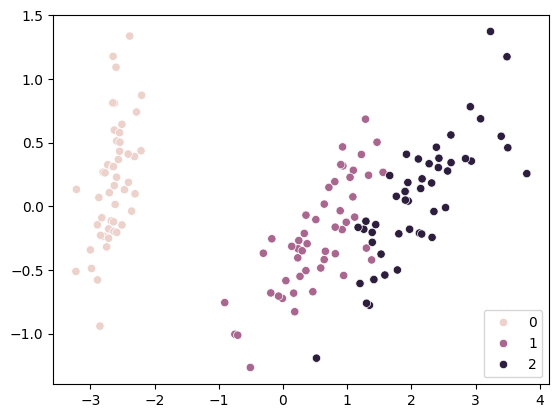

In [25]:
sns.scatterplot(x=x_transformed[:,0], y=x_transformed[:,1], hue=y)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
pca = PCA(n_components=2, random_state=0)

In [30]:
x_std_transformed = pca.fit_transform(x_scaled)

In [31]:
pd.DataFrame(x_std_transformed, columns=['PC1', 'PC2']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
PC1,-2.264703,-2.080961,-2.364229,-2.299384,-2.389842,-2.075631,-2.444029,-2.232847,-2.334640,-2.184328,-2.166310,-2.326131,-2.218451,-2.633101,-2.198741,-2.262215,-2.207588,-2.190350,-1.898572,-2.343369,-1.914323,-2.207013,-2.774345,-1.818670,-2.227163,-1.951846,-2.051151,-2.168577,-2.139563,-2.265261,-2.140122,-1.831595,-2.614948,-2.446177,-2.109975,-2.207809,-2.045146,-2.527332,-2.429633,-2.169711,-2.286475,-1.858122,-2.553638,-1.964448,-2.137059,-2.069744,-2.384733,-2.394376,-2.229447,-2.203833,...,1.844569,1.157882,2.205267,1.440151,1.867812,2.751873,0.367018,2.302439,2.006686,2.259777,1.364175,1.602679,1.883901,1.260115,1.467645,1.590077,1.471431,2.426329,3.310696,1.263767,2.037716,0.977981,2.897651,1.333232,1.700734,1.954327,1.175104,1.020951,1.788350,1.863648,2.435954,2.304928,1.862703,1.114148,1.202473,2.798770,1.576256,1.346292,0.924825,1.852045,2.014810,1.901784,1.157882,2.040558,1.998147,1.870503,1.564580,1.521170,1.372788,0.960656
PC2,0.480027,-0.674134,-0.341908,-0.597395,0.646835,1.489178,0.047644,0.223148,-1.115328,-0.469014,1.043691,0.133078,-0.728676,-0.961507,1.860057,2.686284,1.483609,0.488838,1.405019,1.127849,0.408856,0.924121,0.458344,0.085559,0.137254,-0.625619,0.242164,0.527150,0.313218,-0.337732,-0.504541,0.423695,1.793576,2.150728,-0.460202,-0.206107,0.661558,0.592293,-0.904180,0.268879,0.441715,-2.337415,-0.479101,0.472327,1.142229,-0.711053,1.120430,-0.386247,0.997960,0.009216,...,0.870421,-0.698870,0.562010,-0.046988,0.295045,0.800409,-1.561503,0.420066,-0.711439,1.921010,0.692756,-0.421700,0.419250,-1.162260,-0.442272,0.676245,0.255622,2.556661,0.017781,-1.706745,0.910467,-0.571764,0.413641,-0.481811,1.013922,1.007778,-0.316394,0.064346,-0.187361,0.562291,0.259284,2.626323,-0.178549,-0.292923,-0.811315,0.856803,1.068581,0.422431,0.017223,0.676128,0.613886,0.689575,-0.698870,0.867521,1.049169,0.386966,-0.896687,0.269069,1.011254,-0.024332


In [32]:
pca.explained_variance_ratio_[0]

0.7296244541329991

In [34]:
pca.explained_variance_ratio_[1]

0.22850761786701745

<Axes: >

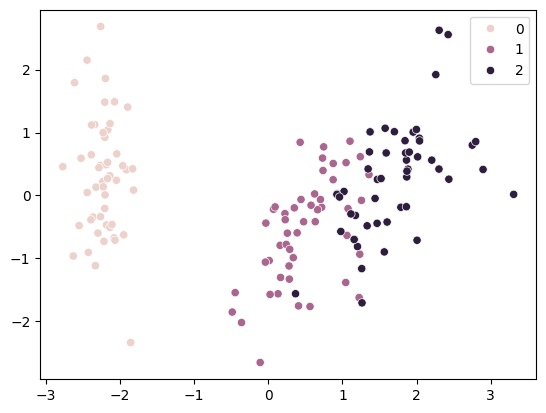

In [36]:
sns.scatterplot(x=x_std_transformed[:,0], y=x_std_transformed[:,1], hue=y) # 次元削減後のplot

In [39]:
df = pd.read_csv('/content/convinience_store.csv')
df.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570
3,4,22850,4100,10145,0,5467,10145
4,5,22500,0,0,0,0,0


In [55]:
x = df.drop('No', axis=1).values # Noの縦軸がいらなかったから消す
x

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570],
       [22850,  4100, 10145,     0,  5467, 10145],
       [22500,     0,     0,     0,     0,     0],
       [22350,  4888, 15070,     0,  6517, 15070],
       [22000,     0,     0,  1103,     0,     0],
       [21600,  7388,  2045,  2583,  9850,  2045],
       [21150,  5525,  1195,  1503,  7367,  1195],
       [19850,  2563,  7445,     0,  3417,  7445],
       [19000,  4188,     0,  5220,  5583,     0],
       [18150,  5025,  9945,   353,  6700,  9945],
       [17400,     0,  8795,  1003,     0,  8795],
       [16800,     0,     0,     0,     0,     0],
       [15750,     0,  9020,     0,     0,  9020],
       [15700,  4625,  8070,     0,  6167,  8070],
       [15350,     0, 14970,  1823,     0, 14970],
       [14550,  6000,  7920,  2147,  8000,  7920],
       [14500,  8775,     0,  1003, 11700,     0],
       [14000,     0, 10120,   

In [45]:
from sklearn.cluster import KMeans

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [47]:
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [49]:
kmeans.cluster_centers_

array([[ 4728.33333333,  3310.13333333,  7251.66666667,  2246.1       ,
         2206.66666667,  3626.1       ],
       [30490.        ,  5910.15      ,  1396.5       ,  1059.9       ,
          985.05      ,   698.35      ],
       [17602.5       ,  3342.        ,  8203.25      ,   958.6       ,
         4310.5       ,  7550.4       ]])

In [52]:
cluster = kmeans.predict(x)

In [53]:
df_cluster = df.copy()
df_cluster['cluster'] = cluster

In [54]:
df_cluster.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1
2,3,23050,5750,11570,0,7667,11570,2
3,4,22850,4100,10145,0,5467,10145,2
4,5,22500,0,0,0,0,0,1


In [92]:
df_cluster[df_cluster['cluster']==0].mean()

,0
No,38.433333
弁当・麺類,4728.333333
飲料,3310.133333
おにぎり・サンドイッチ,7251.666667
スイーツ,2246.100000
カップスープ,2206.666667
サラダ,3626.100000
cluster,0.000000


In [88]:
df_results = pd.DataFrame()  # ここで空のデータフレームを作る
df_results['cluster 0'] = df_cluster[df_cluster['cluster'] == 0].mean()
df_results['cluster 1'] = df_cluster[df_cluster['cluster'] == 1].mean()
df_results['cluster 2'] = df_cluster[df_cluster['cluster'] == 2].mean()

In [91]:
df_results = df_results.drop(['No', 'cluster']).T
df_results

,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster 0,4728.333333,3310.133333,7251.666667,2246.1,2206.666667,3626.10
cluster 1,30490.000000,5910.150000,1396.500000,1059.9,985.050000,698.35
cluster 2,17602.500000,3342.000000,8203.250000,958.6,4310.500000,7550.40
